In [1]:
import csv
import pandas as pd
from sklearn.cluster import SpectralClustering
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np
from kneed import DataGenerator, KneeLocator

In [3]:
df = pd.read_csv('data_final_project_4states.csv')
df

Unnamed: 0         ID           Start_Time          County State  \
0             1012  A-2717612  2016-03-22 18:53:11       El Dorado    CA   
1             1013  A-2717613  2016-03-22 19:00:49     Santa Clara    CA   
2             1014  A-2717614  2016-03-22 20:07:32         Alameda    CA   
3             1015  A-2717615  2016-03-22 21:40:18         Alameda    CA   
4             1016  A-2717616  2016-03-22 21:36:42      Sacramento    CA   
...            ...        ...                  ...             ...   ...   
708081     1516059  A-4239402  2019-08-23 18:03:25       Riverside    CA   
708082     1516060  A-4239403  2019-08-23 19:11:30       San Diego    CA   
708083     1516061  A-4239404  2019-08-23 19:00:21          Orange    CA   
708084     1516062  A-4239405  2019-08-23 19:00:21     Los Angeles    CA   
708085     1516063  A-4239406  2019-08-23 18:52:06  San Bernardino    CA   

        Severity  Start_Lat   Start_Lng Sunrise_Sunset  Weekday  Hour  Month  
0              3  38.825840 -120.029214            Day        1    18      3  
1              2  37.358209 -121.840017            Day        1    19      3  
2              3  37.881943 -122.307987          Night        1    20      3  
3              2  37.881038 -122.307788          Night        1    21      3  
4              2  38.518811 -121.101664          Night        1    21      3  
...          ...        ...         ...            ...      ...   ...    ...  
708081         2  34.002480 -117.379360            Day        4    18      8  
708082         2  32.766960 -117.148060            Day        4    19      8  
708083         2  33.775450 -117.847790            Day        4    19      8  
708084         2  33.992460 -118.403020            Day        4    19      8  
708085         2  34.133930 -117.230920            Day        4    18      8  

[708086 rows x 12 columns]

In [18]:
county_info = pd.read_csv('Accident_Count_Per_Top10County&State.csv')
county_info['n_center']=0
county_info['n_center_used']=0
county_info

County  Counts State  n_center  n_center_used
0      Los Angeles  138817    CA         0              0
1   San Bernardino   30251    CA         0              0
2           Orange   29670    CA         0              0
3        San Diego   26623    CA         0              0
4       Sacramento   25941    CA         0              0
5          Alameda   25285    CA         0              0
6        Riverside   24707    CA         0              0
7      Santa Clara   18772    CA         0              0
8     Contra Costa   12953    CA         0              0
9             Kern   10101    CA         0              0
10      Miami-Dade   47382    FL         0              0
11          Orange   18703    FL         0              0
12         Broward   12421    FL         0              0
13    Hillsborough    9640    FL         0              0
14           Duval    7567    FL         0              0
15      Palm Beach    6456    FL         0              0
16        Pinellas    6244    FL         0              0
17         Manatee    3838    FL         0              0
18             Lee    3535    FL         0              0
19        Sarasota    3277    FL         0              0
20          Dallas   23570    TX         0              0
21          Harris   23053    TX         0              0
22          Travis    7705    TX         0              0
23         Tarrant    6568    TX         0              0
24           Bexar    3974    TX         0              0
25         El Paso    2589    TX         0              0
26          Collin    1077    TX         0              0
27          Denton     991    TX         0              0
28           Smith     828    TX         0              0
29      Williamson     495    TX         0              0
30          Fulton    8793    GA         0              0
31          DeKalb    5001    GA         0              0
32            Cobb    2375    GA         0              0
33         Clayton    1483    GA         0              0
34        Gwinnett    1455    GA         0              0
35           Henry     764    GA         0              0
36         Chatham     586    GA         0              0
37        Richmond     448    GA         0              0
38         Douglas     443    GA         0              0
39          Coweta     439    GA         0              0

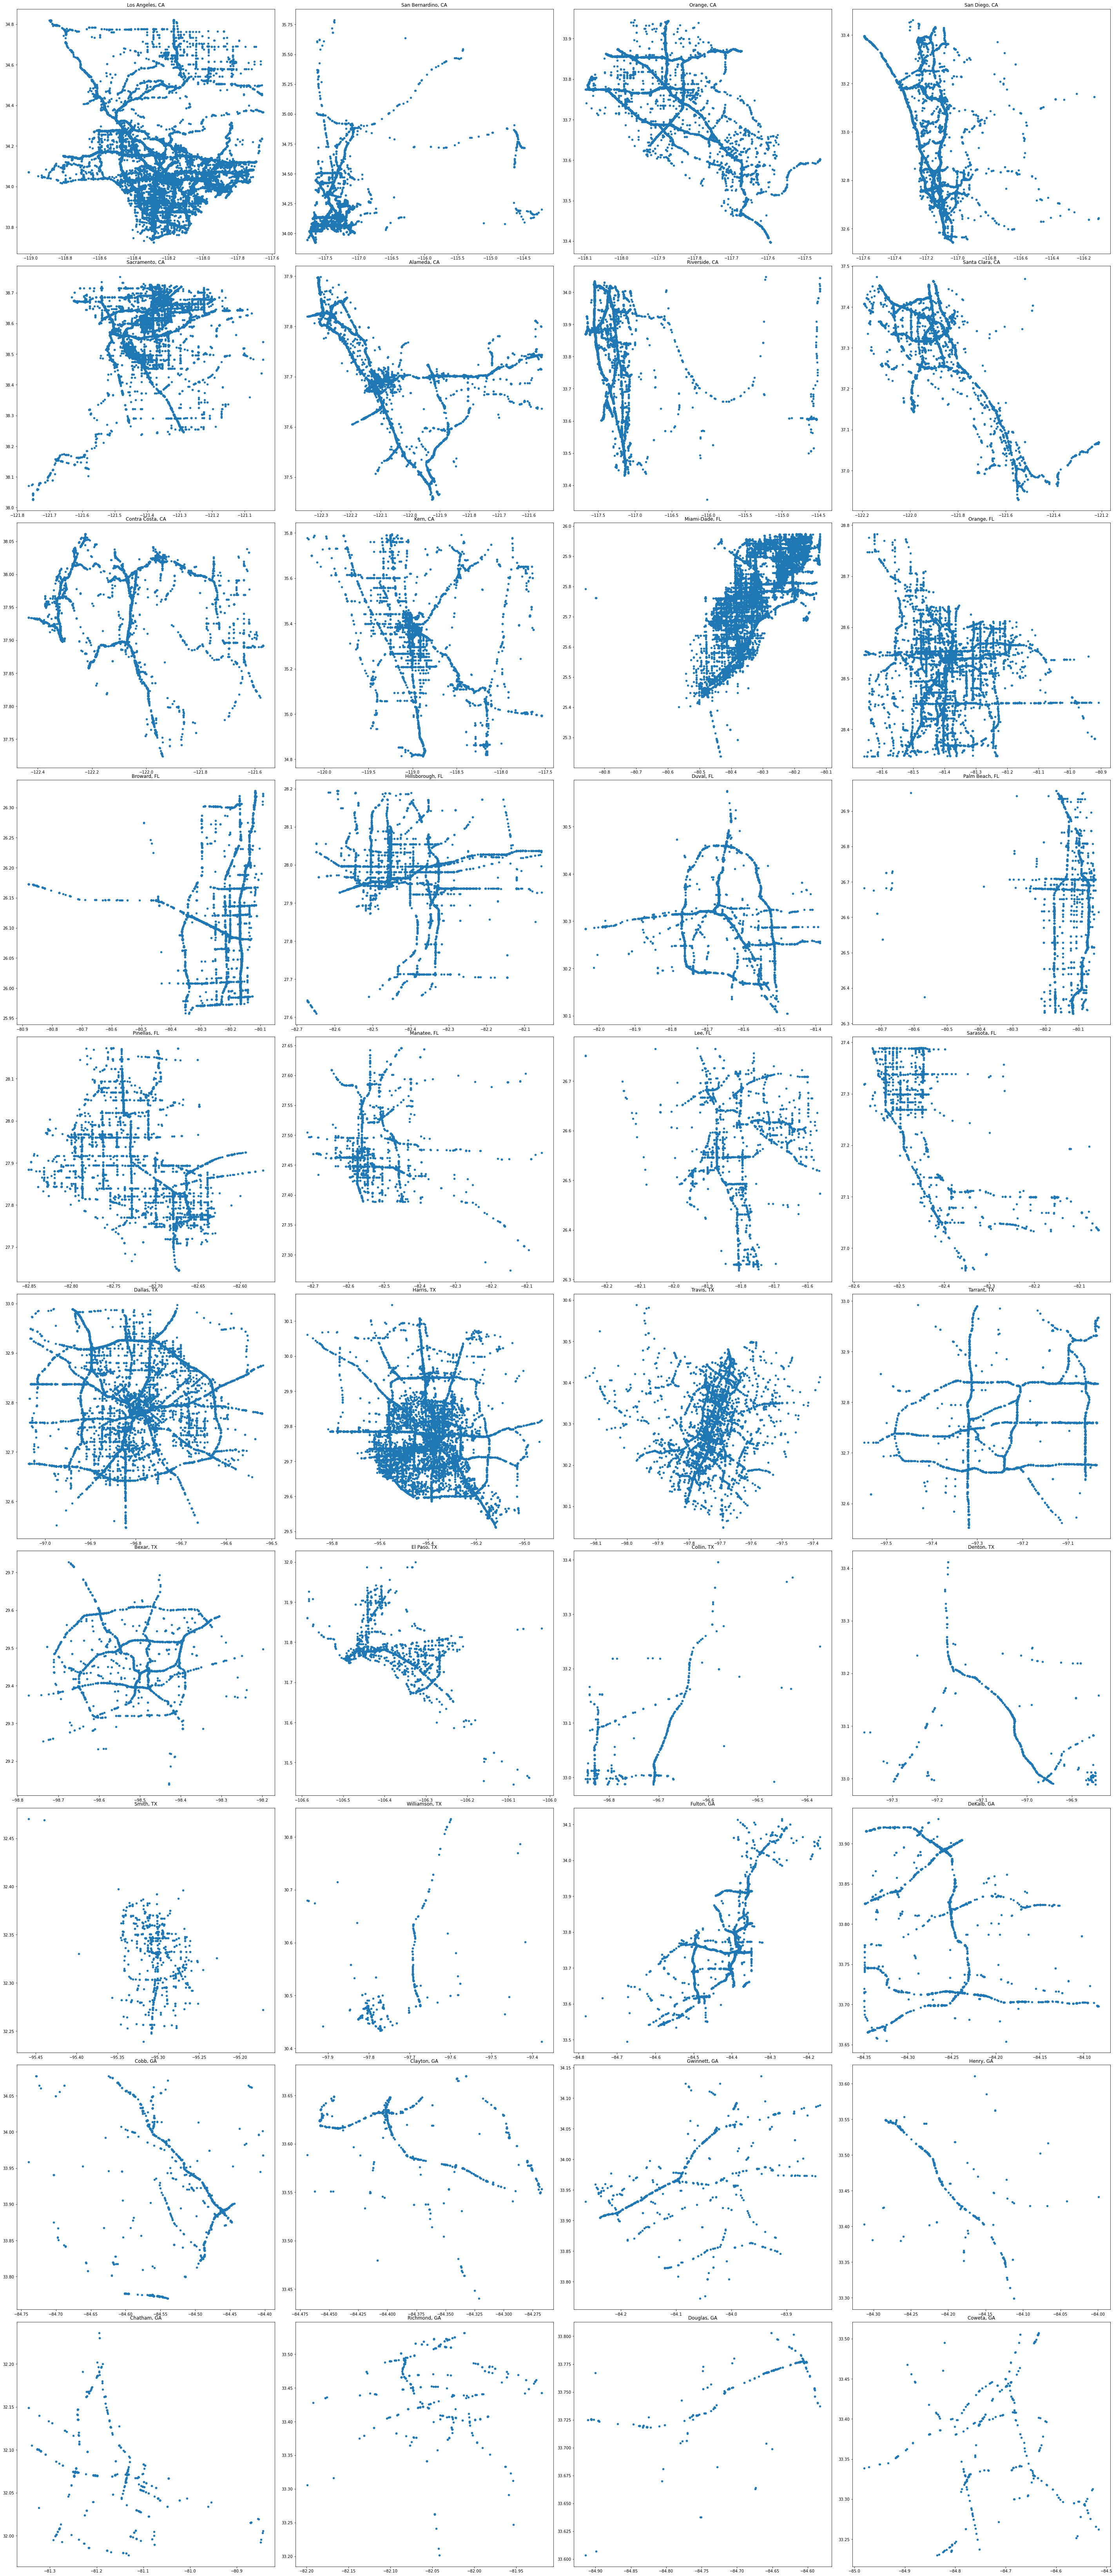

In [12]:
figure, axes = plt.subplots(10, 4, figsize=(50, 120))
plt.subplots_adjust(wspace=0.08, hspace=0.05)
for i in range(40):
    county_acc = df.loc[(df['County']==county_info['County'][i]) & (df['State']==county_info['State'][i]), ['Start_Lng', 'Start_Lat']]
    location = county_acc.values
    axes[i//4][i%4].scatter(location[:, 0], location[:, 1], s=20)
    axes[i//4][i%4].title.set_text(county_info['County'][i] + ', ' + county_info['State'][i])

<ipython-input-15-49d44af1f40b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_info['n_center'][i] = kl.elbow
<ipython-input-15-49d44af1f40b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_info['n_center'][i] = kl.elbow
<ipython-input-15-49d44af1f40b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_info['n_center'][i] = kl.elbow
<ipython-input-15-49d44af1f40b>:22: SettingWithCopyWarning: 
A value is trying 

<ipython-input-15-49d44af1f40b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_info['n_center'][i] = kl.elbow
<ipython-input-15-49d44af1f40b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_info['n_center'][i] = kl.elbow
<ipython-input-15-49d44af1f40b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_info['n_center'][i] = kl.elbow
<ipython-input-15-49d44af1f40b>:22: SettingWithCopyWarning: 
A value is trying 

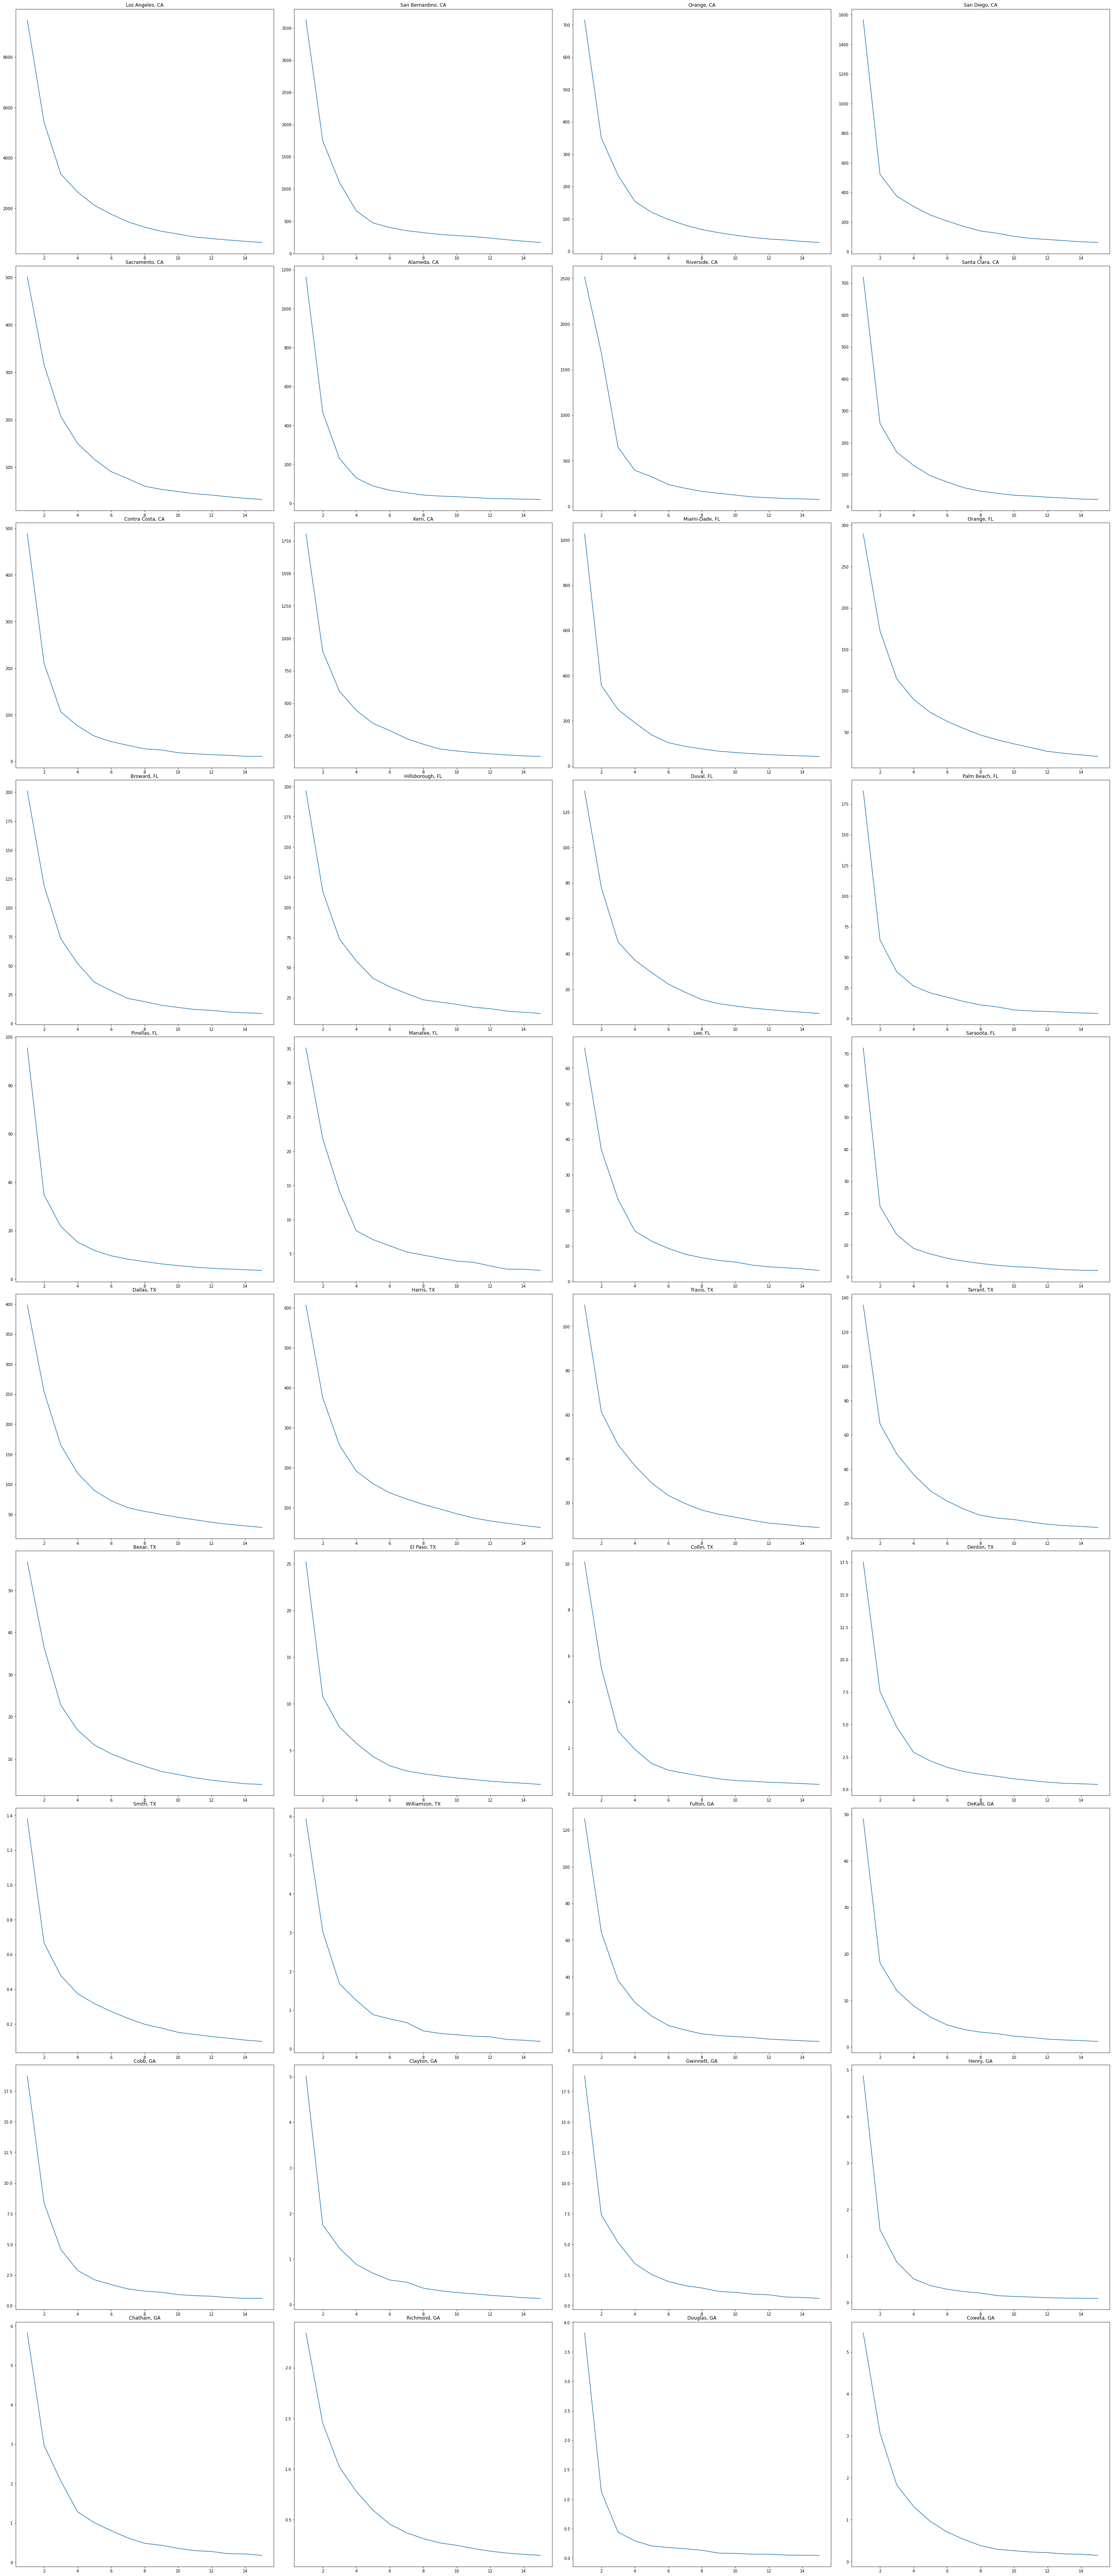

In [15]:
figure, axes = plt.subplots(10, 4, figsize=(50, 120))
plt.subplots_adjust(wspace=0.08, hspace=0.05)
for i in range(40):
    county_acc = df.loc[(df['County']==county_info['County'][i]) & (df['State']==county_info['State'][i]), ['Start_Lat', 'Start_Lng']]
    location = county_acc.values
    sse = []
    kmeans_kwargs = {
       "init": "random",
       "n_init": 15,
       "max_iter": 300,
       "random_state": 42,
       }
    for k in range(1, 16):
       kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
       kmeans.fit(location)
       sse.append(kmeans.inertia_)
    axes[i//4][i%4].plot(range(1, 16), sse)
    axes[i//4][i%4].title.set_text(county_info['County'][i] + ', ' + county_info['State'][i])
    kl = KneeLocator(
       range(1, 16), sse, curve="convex", direction="decreasing"
       )
    county_info['n_center'][i] = kl.elbow

In [16]:
county_info.to_csv("county_n_center.csv")

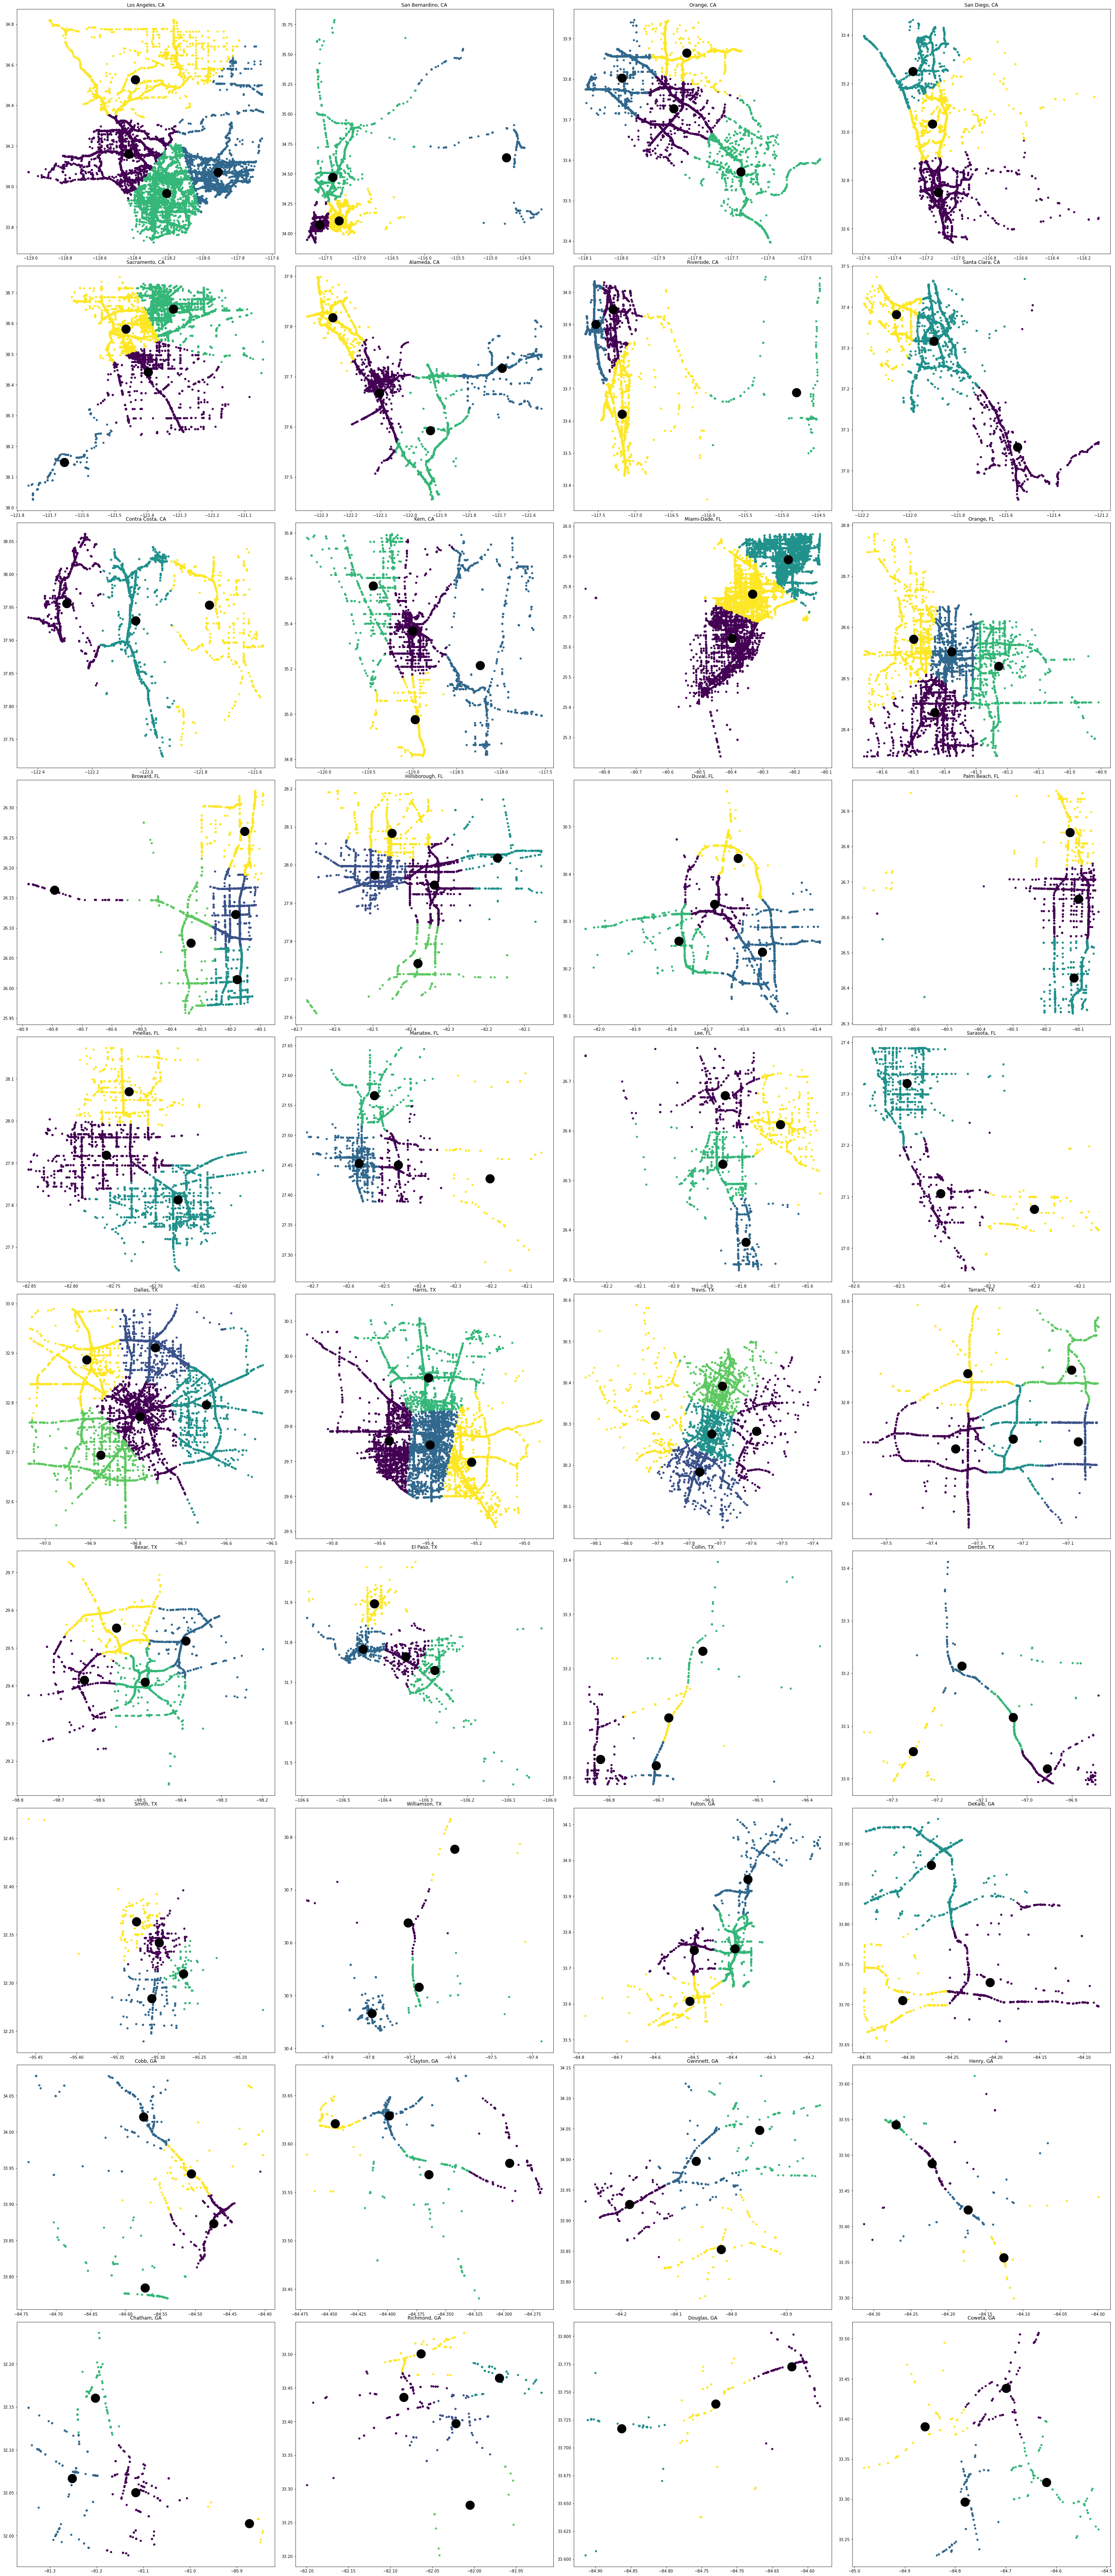

In [17]:
figure, axes = plt.subplots(10, 4, figsize=(50, 120))
plt.subplots_adjust(wspace=0.08, hspace=0.05)
for i in range(40):
    county_acc = df.loc[(df['County']==county_info['County'][i]) & (df['State']==county_info['State'][i]), ['Start_Lng', 'Start_Lat']]
    location = county_acc.values
    n = county_info['n_center'][i]
    kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
    y_kmeans = kmeans.predict(location)
    axes[i//4][i%4].scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis')
    centers = kmeans.cluster_centers_
    axes[i//4][i%4].scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=1)
    axes[i//4][i%4].title.set_text(county_info['County'][i] + ', ' + county_info['State'][i])

# CA Top 5 County:

Lat        Lng State       County  center_id  counts
0  -118.400058  34.000269    CA  Log Angeles          0   11518
1  -118.012003  34.071250    CA  Log Angeles          1   15645
2  -118.507718  34.359486    CA  Log Angeles          2    6449
3  -118.260102  33.881183    CA  Log Angeles          3   19360
4  -117.824479  34.060969    CA  Log Angeles          4   13355
5  -118.108342  33.907962    CA  Log Angeles          5   16228
6  -118.663092  34.133709    CA  Log Angeles          6    2757
7  -118.129248  34.578458    CA  Log Angeles          7    3326
8  -118.754009  34.696796    CA  Log Angeles          8     977
9  -118.219268  34.035812    CA  Log Angeles          9   24236
10 -118.439171  34.193795    CA  Log Angeles         10   13887
11 -118.259496  34.149639    CA  Log Angeles         11   11079

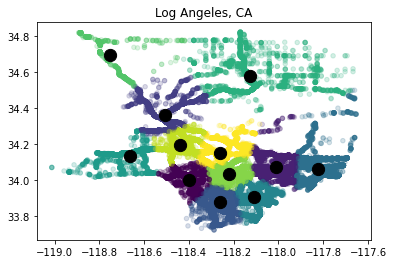

In [177]:
# Log Angeles, CA
county_acc = df.loc[(df['County']==county_info['County'][0]) & (df['State']=='CA'), ['Start_Lng', 'Start_Lat']]
location = county_acc.values
n = 12
kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
y_kmeans = kmeans.predict(location)
plt.scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis', alpha=0.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=1)
plt.title('Log Angeles, CA')
county_acc_CA1_centers = pd.DataFrame(kmeans.cluster_centers_).rename(columns={0: 'Lat', 1: "Lng"})
county_acc_CA1_centers['State']='CA'
county_acc_CA1_centers['County']='Log Angeles'
county_acc_CA1_centers['center_id'] = county_acc_CA1_centers.index
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counts = pd.DataFrame({'counts':counts})
county_acc_CA1_centers['counts'] = counts
county_acc_CA1_centers

Lat        Lng State          County  center_id  counts
0 -117.254838  34.093602    CA  San Bernardino          0    9675
1 -117.620840  34.065756    CA  San Bernardino          1    9748
2 -114.705767  34.606494    CA  San Bernardino          2     245
3 -117.435147  34.127178    CA  San Bernardino          3    6385
4 -117.430658  34.385610    CA  San Bernardino          4    3471
5 -117.195411  34.874788    CA  San Bernardino          5     727

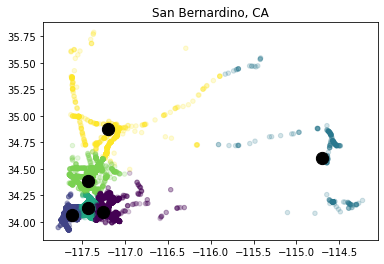

In [172]:
# San Bernardino, CA
county_acc = df.loc[(df['County']==county_info['County'][1]) & (df['State']=='CA'), ['Start_Lng', 'Start_Lat']]
location = county_acc.values
n = 6
kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
y_kmeans = kmeans.predict(location)
plt.scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis', alpha=0.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=1)
plt.title('San Bernardino, CA')

county_acc_CA2_centers = pd.DataFrame(kmeans.cluster_centers_).rename(columns={0: 'Lat', 1: "Lng"})
county_acc_CA2_centers['State']='CA'
county_acc_CA2_centers['County']='San Bernardino'
county_acc_CA2_centers['center_id'] = county_acc_CA2_centers.index
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counts = pd.DataFrame({'counts':counts})
county_acc_CA2_centers['counts'] = counts
county_acc_CA2_centers

Lat        Lng State  County  center_id  counts
0 -117.876510  33.680465    CA  Orange          0    3241
1 -117.976306  33.852191    CA  Orange          1    3057
2 -117.624399  33.491471    CA  Orange          2    1401
3 -117.868086  33.870560    CA  Orange          3    4082
4 -117.738577  33.863998    CA  Orange          4    2273
5 -118.065468  33.777545    CA  Orange          5    1777
6 -117.773552  33.688491    CA  Orange          6    2641
7 -117.685153  33.595154    CA  Orange          7    2621
8 -117.969447  33.738111    CA  Orange          8    2609
9 -117.863894  33.771511    CA  Orange          9    5968

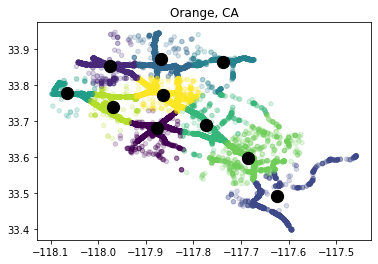

In [173]:
# Orange, CA
county_acc = df.loc[(df['County']==county_info['County'][2]) & (df['State']=='CA'), ['Start_Lng', 'Start_Lat']]
location = county_acc.values
n = 10
kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
y_kmeans = kmeans.predict(location)
plt.scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis', alpha=0.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=1)
plt.title('Orange, CA')

county_acc_CA3_centers = pd.DataFrame(kmeans.cluster_centers_).rename(columns={0: 'Lat', 1: "Lng"})
county_acc_CA3_centers['State']='CA'
county_acc_CA3_centers['County']='Orange'
county_acc_CA3_centers['center_id'] = county_acc_CA3_centers.index
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counts = pd.DataFrame({'counts':counts})
county_acc_CA3_centers['counts'] = counts
county_acc_CA3_centers

Lat        Lng State     County  center_id  counts
0 -117.075095  32.673220    CA  San Diego          0    4073
1 -117.258117  32.999735    CA  San Diego          1    2126
2 -117.075733  33.002420    CA  San Diego          2    1736
3 -117.180245  33.337182    CA  San Diego          3    1861
4 -117.509953  33.331727    CA  San Diego          4     642
5 -117.140462  32.752087    CA  San Diego          5    7208
6 -117.140089  33.142735    CA  San Diego          6    2547
7 -117.325001  33.167309    CA  San Diego          7    2471
8 -116.557422  32.860723    CA  San Diego          8     130
9 -117.164953  32.856060    CA  San Diego          9    3829

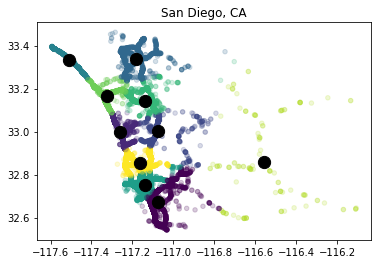

In [175]:
# San Diego, CA
county_acc = df.loc[(df['County']==county_info['County'][3]) & (df['State']=='CA'), ['Start_Lng', 'Start_Lat']]
location = county_acc.values
n = 10
kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
y_kmeans = kmeans.predict(location)
plt.scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis', alpha=0.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=1)
plt.title('San Diego, CA')

county_acc_CA4_centers = pd.DataFrame(kmeans.cluster_centers_).rename(columns={0: 'Lat', 1: "Lng"})
county_acc_CA4_centers['State']='CA'
county_acc_CA4_centers['County']='San Diego'
county_acc_CA4_centers['center_id'] = county_acc_CA4_centers.index
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counts = pd.DataFrame({'counts':counts})
county_acc_CA4_centers['counts'] = counts
county_acc_CA4_centers

Lat        Lng State      County  center_id  counts
0 -121.353927  38.670702    CA  Sacramento          0    4777
1 -121.481152  38.359909    CA  Sacramento          1     482
2 -121.481182  38.546888    CA  Sacramento          2    5595
3 -121.313182  38.328923    CA  Sacramento          3     860
4 -121.516834  38.641979    CA  Sacramento          4    2481
5 -121.331109  38.554599    CA  Sacramento          5    1693
6 -121.409927  38.599648    CA  Sacramento          6    4379
7 -121.222115  38.641499    CA  Sacramento          7    2078
8 -121.418025  38.475536    CA  Sacramento          8    3176
9 -121.665374  38.135715    CA  Sacramento          9     420

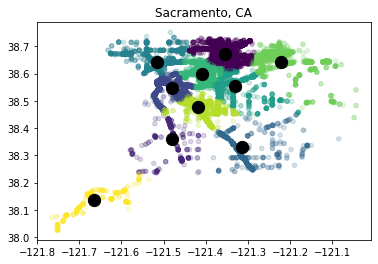

In [176]:
# Sacramento, CA
county_acc = df.loc[(df['County']==county_info['County'][4]) & (df['State']=='CA'), ['Start_Lng', 'Start_Lat']]
location = county_acc.values
n = 10
kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
y_kmeans = kmeans.predict(location)
plt.scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis', alpha=0.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=1)
plt.title('Sacramento, CA')

county_acc_CA5_centers = pd.DataFrame(kmeans.cluster_centers_).rename(columns={0: 'Lat', 1: "Lng"})
county_acc_CA5_centers['State']='CA'
county_acc_CA5_centers['County']='Sacramento'
county_acc_CA5_centers['center_id'] = county_acc_CA5_centers.index
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counts = pd.DataFrame({'counts':counts})
county_acc_CA5_centers['counts'] = counts
county_acc_CA5_centers

# FL Top 5 County

Lat        Lng State      County  center_id  counts
0  -80.324652  25.787740    FL  Miami-Dade          0    4159
1  -80.204077  25.918437    FL  Miami-Dade          1    6830
2  -80.408499  25.675107    FL  Miami-Dade          2    5446
3  -80.220530  25.864486    FL  Miami-Dade          3    5155
4  -80.303492  25.929717    FL  Miami-Dade          4    3064
5  -80.364629  25.602018    FL  Miami-Dade          5    3376
6  -80.325655  25.715175    FL  Miami-Dade          6    4414
7  -80.214168  25.797066    FL  Miami-Dade          7    5318
8  -80.450651  25.487710    FL  Miami-Dade          8    1481
9  -80.161900  25.947527    FL  Miami-Dade          9    2888
10 -80.393077  25.755935    FL  Miami-Dade         10    2591
11 -80.342391  25.874873    FL  Miami-Dade         11    2660

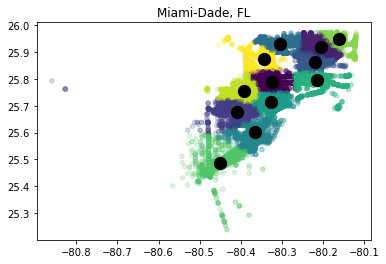

In [178]:
# Miami-Dade, FL
county_acc = df.loc[(df['County']==county_info['County'][10]) & (df['State']=='FL'), ['Start_Lng', 'Start_Lat']]
location = county_acc.values
n = 12
kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
y_kmeans = kmeans.predict(location)
plt.scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis', alpha=0.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=1)
plt.title('Miami-Dade, FL')

county_acc_FL1_centers = pd.DataFrame(kmeans.cluster_centers_).rename(columns={0: 'Lat', 1: "Lng"})
county_acc_FL1_centers['State']='FL'
county_acc_FL1_centers['County']='Miami-Dade'
county_acc_FL1_centers['center_id'] = county_acc_FL1_centers.index
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counts = pd.DataFrame({'counts':counts})
county_acc_FL1_centers['counts'] = counts
county_acc_FL1_centers

Lat        Lng State  County  center_id  counts
0  -81.396079  28.602919    FL  Orange          0    1787
1  -81.454815  28.467564    FL  Orange          1    2352
2  -81.294216  28.553732    FL  Orange          2    2138
3  -81.210479  28.565674    FL  Orange          3    1141
4  -81.574568  28.536878    FL  Orange          4     634
5  -81.470121  28.561459    FL  Orange          5    1996
6  -81.273463  28.440754    FL  Orange          6    1086
7  -81.034306  28.464699    FL  Orange          7     311
8  -81.518969  28.376949    FL  Orange          8     701
9  -81.531957  28.685585    FL  Orange          9     422
10 -81.389628  28.528184    FL  Orange         10    3689
11 -81.399157  28.415146    FL  Orange         11    2446

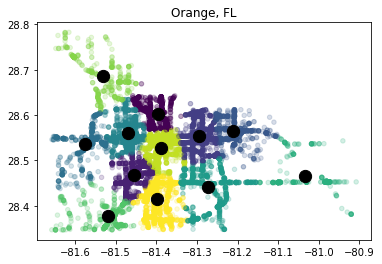

In [179]:
# Orange, FL
county_acc = df.loc[(df['County']==county_info['County'][11]) & (df['State']=='FL'), ['Start_Lng', 'Start_Lat']]
location = county_acc.values
n = 12
kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
y_kmeans = kmeans.predict(location)
plt.scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis', alpha=0.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=1)
plt.title('Orange, FL')

county_acc_FL2_centers = pd.DataFrame(kmeans.cluster_centers_).rename(columns={0: 'Lat', 1: "Lng"})
county_acc_FL2_centers['State']='FL'
county_acc_FL2_centers['County']='Orange'
county_acc_FL2_centers['center_id'] = county_acc_FL2_centers.index
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counts = pd.DataFrame({'counts':counts})
county_acc_FL2_centers['counts'] = counts
county_acc_FL2_centers

Lat        Lng State   County  center_id  counts
0 -80.274981  26.251101    FL  Broward          0     282
1 -80.171381  26.008883    FL  Broward          1    3049
2 -80.136414  26.284836    FL  Broward          2    1379
3 -80.347004  26.115548    FL  Broward          3     997
4 -80.801346  26.163768    FL  Broward          4     101
5 -80.192967  26.093080    FL  Broward          5    3421
6 -80.161713  26.175779    FL  Broward          6    2386
7 -80.308499  25.993039    FL  Broward          7     806

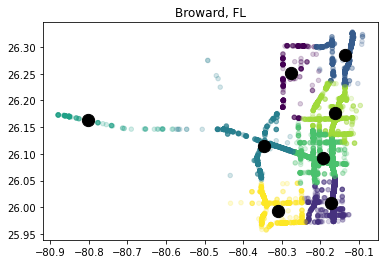

In [180]:
# Broward, FL
county_acc = df.loc[(df['County']==county_info['County'][12]) & (df['State']=='FL'), ['Start_Lng', 'Start_Lat']]
location = county_acc.values
n = 8
kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
y_kmeans = kmeans.predict(location)
plt.scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis', alpha=0.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=1)
plt.title('Broward, FL')

county_acc_FL3_centers = pd.DataFrame(kmeans.cluster_centers_).rename(columns={0: 'Lat', 1: "Lng"})
county_acc_FL3_centers['State']='FL'
county_acc_FL3_centers['County']='Broward'
county_acc_FL3_centers['center_id'] = county_acc_FL3_centers.index
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counts = pd.DataFrame({'counts':counts})
county_acc_FL3_centers['counts'] = counts
county_acc_FL3_centers

Lat        Lng State        County  center_id  counts
0 -82.535513  27.966043    FL  Hillsborough          0    1427
1 -82.336629  28.010559    FL  Hillsborough          1    1323
2 -82.475081  28.073324    FL  Hillsborough          2    1360
3 -82.342297  27.863611    FL  Hillsborough          3     719
4 -82.362266  27.739431    FL  Hillsborough          4     725
5 -82.659989  27.634796    FL  Hillsborough          5      57
6 -82.158458  28.021102    FL  Hillsborough          6     671
7 -82.445584  27.972668    FL  Hillsborough          7    1880
8 -82.391508  28.143561    FL  Hillsborough          8     235
9 -82.317341  27.937153    FL  Hillsborough          9    1243

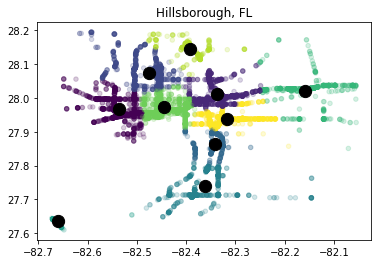

In [181]:
# Hillsborough, FL
county_acc = df.loc[(df['County']==county_info['County'][13]) & (df['State']=='FL'), ['Start_Lng', 'Start_Lat']]
location = county_acc.values
n = 10
kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
y_kmeans = kmeans.predict(location)
plt.scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis', alpha=0.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=1)
plt.title('Hillsborough, FL')

county_acc_FL4_centers = pd.DataFrame(kmeans.cluster_centers_).rename(columns={0: 'Lat', 1: "Lng"})
county_acc_FL4_centers['State']='FL'
county_acc_FL4_centers['County']='Hillsborough'
county_acc_FL4_centers['center_id'] = county_acc_FL4_centers.index
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counts = pd.DataFrame({'counts':counts})
county_acc_FL4_centers['counts'] = counts
county_acc_FL4_centers

Lat        Lng State County  center_id  counts
0 -81.761761  30.324465    FL  Duval          0     989
1 -81.578406  30.194206    FL  Duval          1    1155
2 -81.553756  30.374491    FL  Duval          2     751
3 -81.662081  30.327236    FL  Duval          3    1852
4 -81.743306  30.215705    FL  Duval          4     829
5 -81.947752  30.289332    FL  Duval          5     193
6 -81.504659  30.260242    FL  Duval          6     924
7 -81.654605  30.459403    FL  Duval          7     874

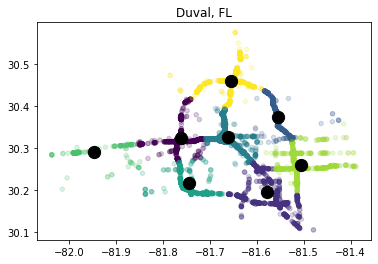

In [182]:
# Duval, FL
county_acc = df.loc[(df['County']==county_info['County'][14]) & (df['State']=='FL'), ['Start_Lng', 'Start_Lat']]
location = county_acc.values
n = 8
kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
y_kmeans = kmeans.predict(location)
plt.scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis', alpha=0.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=1)
plt.title('Duval, FL')

county_acc_FL5_centers = pd.DataFrame(kmeans.cluster_centers_).rename(columns={0: 'Lat', 1: "Lng"})
county_acc_FL5_centers['State']='FL'
county_acc_FL5_centers['County']='Duval'
county_acc_FL5_centers['center_id'] = county_acc_FL5_centers.index
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counts = pd.DataFrame({'counts':counts})
county_acc_FL5_centers['counts'] = counts
county_acc_FL5_centers

Lat        Lng State  County  center_id  counts
0  -96.829103  32.728115    TX  Dallas          0    2008
1  -96.757653  32.917933    TX  Dallas          1    3136
2  -96.640834  32.709797    TX  Dallas          2     890
3  -96.877370  32.825766    TX  Dallas          3    1445
4  -96.911411  32.915681    TX  Dallas          4    2059
5  -96.611273  32.828383    TX  Dallas          5    1469
6  -96.957284  32.681967    TX  Dallas          6     661
7  -96.848755  32.653127    TX  Dallas          7    1321
8  -96.708550  32.788475    TX  Dallas          8    1340
9  -96.694637  32.881513    TX  Dallas          9    1735
10 -96.746723  32.669903    TX  Dallas         10     873
11 -96.791836  32.791140    TX  Dallas         11    4223
12 -96.826258  32.924576    TX  Dallas         12    1284
13 -96.954725  32.793226    TX  Dallas         13    1126

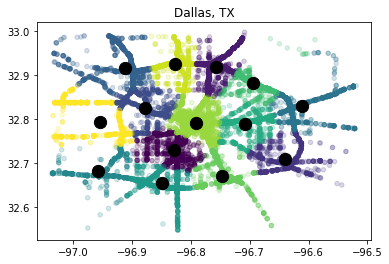

In [183]:
# Dallas, TX
county_acc = df.loc[(df['County']==county_info['County'][20]) & (df['State']=='TX'), ['Start_Lng', 'Start_Lat']]
location = county_acc.values
n = 14
kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
y_kmeans = kmeans.predict(location)
plt.scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis', alpha=0.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=1)
plt.title('Dallas, TX')

county_acc_TX1_centers = pd.DataFrame(kmeans.cluster_centers_).rename(columns={0: 'Lat', 1: "Lng"})
county_acc_TX1_centers['State']='TX'
county_acc_TX1_centers['County']='Dallas'
county_acc_TX1_centers['center_id'] = county_acc_TX1_centers.index
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counts = pd.DataFrame({'counts':counts})
county_acc_TX1_centers['counts'] = counts
county_acc_TX1_centers

Lat        Lng State  County  center_id  counts
0  -95.375349  29.834760    TX  Harris          0    3007
1  -95.387032  29.650571    TX  Harris          1    1817
2  -95.551585  29.697709    TX  Harris          2    2273
3  -95.115111  29.755970    TX  Harris          3     791
4  -95.438173  29.973105    TX  Harris          4    1959
5  -95.712660  29.837358    TX  Harris          5     605
6  -95.460855  29.745477    TX  Harris          6    3189
7  -95.277762  29.945807    TX  Harris          7     780
8  -95.271046  29.724878    TX  Harris          8    2544
9  -95.547001  29.823671    TX  Harris          9    1962
10 -95.191763  29.599606    TX  Harris         10    1059
11 -95.366971  29.753122    TX  Harris         11    3067

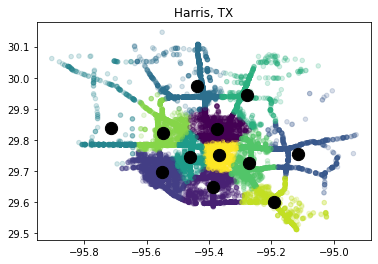

In [184]:
# Harris, TX
county_acc = df.loc[(df['County']==county_info['County'][21]) & (df['State']=='TX'), ['Start_Lng', 'Start_Lat']]
location = county_acc.values
n = 12
kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
y_kmeans = kmeans.predict(location)
plt.scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis', alpha=0.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=1)
plt.title('Harris, TX')

county_acc_TX2_centers = pd.DataFrame(kmeans.cluster_centers_).rename(columns={0: 'Lat', 1: "Lng"})
county_acc_TX2_centers['State']='TX'
county_acc_TX2_centers['County']='Harris'
county_acc_TX2_centers['center_id'] = county_acc_TX2_centers.index
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counts = pd.DataFrame({'counts':counts})
county_acc_TX2_centers['counts'] = counts
county_acc_TX2_centers

Lat        Lng State  County  center_id  counts
0  -97.544149  30.352790    TX  Travis          0     311
1  -97.735218  30.227894    TX  Travis          1    1048
2  -97.741142  30.379691    TX  Travis          2     663
3  -97.667495  30.427810    TX  Travis          3     929
4  -97.857416  30.238040    TX  Travis          4     484
5  -98.024054  30.347857    TX  Travis          5      96
6  -97.734285  30.281131    TX  Travis          6    1339
7  -97.689975  30.338205    TX  Travis          7    1201
8  -97.786142  30.170937    TX  Travis          8     809
9  -97.679939  30.146042    TX  Travis          9     312
10 -97.609871  30.225372    TX  Travis         10     352
11 -97.872578  30.423675    TX  Travis         11     161

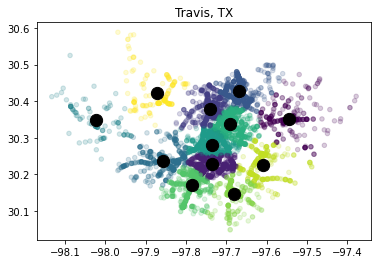

In [185]:
# Travis, TX
county_acc = df.loc[(df['County']==county_info['County'][22]) & (df['State']=='TX'), ['Start_Lng', 'Start_Lat']]
location = county_acc.values
n = 12
kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
y_kmeans = kmeans.predict(location)
plt.scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis', alpha=0.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=1)
plt.title('Travis, TX')

county_acc_TX3_centers = pd.DataFrame(kmeans.cluster_centers_).rename(columns={0: 'Lat', 1: "Lng"})
county_acc_TX3_centers['State']='TX'
county_acc_TX3_centers['County']='Travis'
county_acc_TX3_centers['center_id'] = county_acc_TX3_centers.index
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counts = pd.DataFrame({'counts':counts})
county_acc_TX3_centers['counts'] = counts
county_acc_TX3_centers

Lat        Lng State   County  center_id  counts
0  -97.326567  32.655246    TX  Tarrant          0     717
1  -97.081427  32.677488    TX  Tarrant          1     464
2  -97.081165  32.837679    TX  Tarrant          2     611
3  -97.205968  32.821492    TX  Tarrant          3     480
4  -97.326633  32.838157    TX  Tarrant          4     566
5  -97.215645  32.758843    TX  Tarrant          5     504
6  -97.074428  32.754864    TX  Tarrant          6     645
7  -97.452248  32.733800    TX  Tarrant          7     393
8  -97.318992  32.750037    TX  Tarrant          8     916
9  -97.223863  32.672524    TX  Tarrant          9     747
10 -97.315987  32.931734    TX  Tarrant         10     213
11 -97.080367  32.924998    TX  Tarrant         11     312

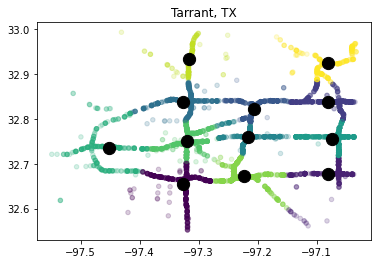

In [186]:
# Tarrant, TX
county_acc = df.loc[(df['County']==county_info['County'][23]) & (df['State']=='TX'), ['Start_Lng', 'Start_Lat']]
location = county_acc.values
n = 12
kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
y_kmeans = kmeans.predict(location)
plt.scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis', alpha=0.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=1)
plt.title('Tarrant, TX')

county_acc_TX4_centers = pd.DataFrame(kmeans.cluster_centers_).rename(columns={0: 'Lat', 1: "Lng"})
county_acc_TX4_centers['State']='TX'
county_acc_TX4_centers['County']='Tarrant'
county_acc_TX4_centers['center_id'] = county_acc_TX4_centers.index
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counts = pd.DataFrame({'counts':counts})
county_acc_TX4_centers['counts'] = counts
county_acc_TX4_centers

Lat        Lng State County  center_id  counts
0 -98.616036  29.593231    TX  Bexar          0     411
1 -98.498830  29.417226    TX  Bexar          1    1188
2 -98.403477  29.479722    TX  Bexar          2     496
3 -98.604722  29.323029    TX  Bexar          3     128
4 -98.531341  29.505971    TX  Bexar          4     688
5 -98.352809  29.564293    TX  Bexar          5     273
6 -98.484467  29.597572    TX  Bexar          6     225
7 -98.423916  29.334878    TX  Bexar          7     187
8 -98.642311  29.437465    TX  Bexar          8     378

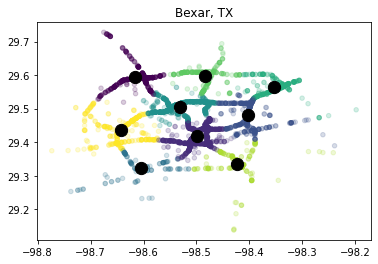

In [187]:
# Bexar, TX
county_acc = df.loc[(df['County']==county_info['County'][24]) & (df['State']=='TX'), ['Start_Lng', 'Start_Lat']]
location = county_acc.values
n = 9
kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
y_kmeans = kmeans.predict(location)
plt.scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis', alpha=0.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=1)
plt.title('Bexar, TX')

county_acc_TX5_centers = pd.DataFrame(kmeans.cluster_centers_).rename(columns={0: 'Lat', 1: "Lng"})
county_acc_TX5_centers['State']='TX'
county_acc_TX5_centers['County']='Bexar'
county_acc_TX5_centers['center_id'] = county_acc_TX5_centers.index
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counts = pd.DataFrame({'counts':counts})
county_acc_TX5_centers['counts'] = counts
county_acc_TX5_centers

# GA Top 5

Lat        Lng State  County  center_id  counts
0  -84.391503  33.742005    GA  Fulton          0    1773
1  -84.336164  34.006869    GA  Fulton          1     279
2  -84.554954  33.567229    GA  Fulton          2     344
3  -84.507540  33.703355    GA  Fulton          3     474
4  -84.392733  33.785270    GA  Fulton          4    1395
5  -84.487635  33.625981    GA  Fulton          5     587
6  -84.366316  33.917156    GA  Fulton          6     727
7  -84.496112  33.766594    GA  Fulton          7    1177
8  -84.402203  33.682276    GA  Fulton          8     968
9  -84.367436  33.820940    GA  Fulton          9     575
10 -84.264403  34.062389    GA  Fulton         10     166
11 -84.429594  33.878276    GA  Fulton         11     328

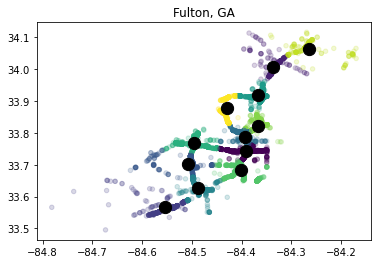

In [188]:
# Fulton, GA
county_acc = df.loc[(df['County']==county_info['County'][30]) & (df['State']=='GA'), ['Start_Lng', 'Start_Lat']]
location = county_acc.values
n = 12
kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
y_kmeans = kmeans.predict(location)
plt.scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis', alpha=0.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=1)
plt.title('Fulton, GA')

county_acc_GA1_centers = pd.DataFrame(kmeans.cluster_centers_).rename(columns={0: 'Lat', 1: "Lng"})
county_acc_GA1_centers['State']='GA'
county_acc_GA1_centers['County']='Fulton'
county_acc_GA1_centers['center_id'] = county_acc_GA1_centers.index
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counts = pd.DataFrame({'counts':counts})
county_acc_GA1_centers['counts'] = counts
county_acc_GA1_centers

Lat        Lng State  County  center_id  counts
0 -84.261500  33.892314    GA  DeKalb          0    1266
1 -84.262549  33.707154    GA  DeKalb          1     527
2 -84.145593  33.703261    GA  DeKalb          2     384
3 -84.319897  33.839456    GA  DeKalb          3     337
4 -84.247061  33.813173    GA  DeKalb          4     658
5 -84.329936  33.735759    GA  DeKalb          5     294
6 -84.325404  33.918179    GA  DeKalb          6     312
7 -84.226643  33.723383    GA  DeKalb          7     766
8 -84.174413  33.827643    GA  DeKalb          8     137
9 -84.324486  33.676029    GA  DeKalb          9     320

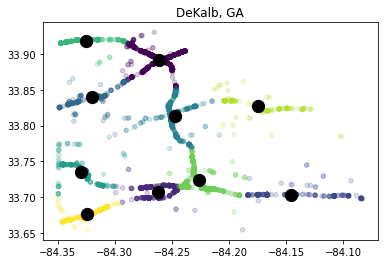

In [189]:
# DeKalb, GA
county_acc = df.loc[(df['County']==county_info['County'][31]) & (df['State']=='GA'), ['Start_Lng', 'Start_Lat']]
location = county_acc.values
n = 10
kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
y_kmeans = kmeans.predict(location)
plt.scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis', alpha=0.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=1)
plt.title('DeKalb, GA')

county_acc_GA2_centers = pd.DataFrame(kmeans.cluster_centers_).rename(columns={0: 'Lat', 1: "Lng"})
county_acc_GA2_centers['State']='GA'
county_acc_GA2_centers['County']='DeKalb'
county_acc_GA2_centers['center_id'] = county_acc_GA2_centers.index
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counts = pd.DataFrame({'counts':counts})
county_acc_GA2_centers['counts'] = counts
county_acc_GA2_centers

Lat        Lng State County  center_id  counts
0 -84.505129  33.940774    GA   Cobb          0     541
1 -84.558742  33.996116    GA   Cobb          1     331
2 -84.573922  33.783857    GA   Cobb          2     216
3 -84.490551  33.837775    GA   Cobb          3     327
4 -84.466135  33.891441    GA   Cobb          4     738
5 -84.587272  34.046660    GA   Cobb          5     222

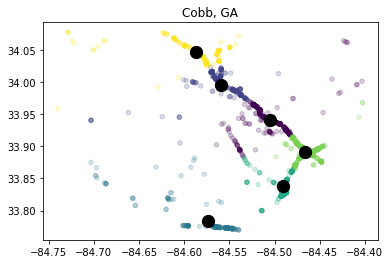

In [190]:
# Cobb, GA
county_acc = df.loc[(df['County']==county_info['County'][32]) & (df['State']=='GA'), ['Start_Lng', 'Start_Lat']]
location = county_acc.values
n = 6
kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
y_kmeans = kmeans.predict(location)
plt.scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis', alpha=0.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=1)
plt.title('Cobb, GA')

county_acc_GA3_centers = pd.DataFrame(kmeans.cluster_centers_).rename(columns={0: 'Lat', 1: "Lng"})
county_acc_GA3_centers['State']='GA'
county_acc_GA3_centers['County']='Cobb'
county_acc_GA3_centers['center_id'] = county_acc_GA3_centers.index
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counts = pd.DataFrame({'counts':counts})
county_acc_GA3_centers['counts'] = counts
county_acc_GA3_centers

Lat        Lng State   County  center_id  counts
0 -84.305976  33.627660    GA  Clayton          0      81
1 -84.445061  33.621135    GA  Clayton          1     288
2 -84.296639  33.557813    GA  Clayton          2     191
3 -84.399492  33.628467    GA  Clayton          3     711
4 -84.366674  33.575535    GA  Clayton          4     212

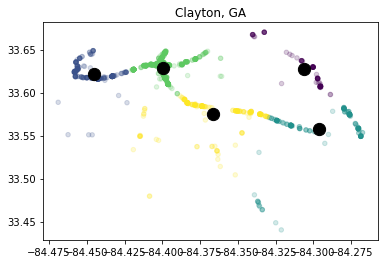

In [191]:
# Clayton, GA
county_acc = df.loc[(df['County']==county_info['County'][33]) & (df['State']=='GA'), ['Start_Lng', 'Start_Lat']]
location = county_acc.values
n = 5
kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
y_kmeans = kmeans.predict(location)
plt.scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis', alpha=0.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=1)
plt.title('Clayton, GA')

county_acc_GA4_centers = pd.DataFrame(kmeans.cluster_centers_).rename(columns={0: 'Lat', 1: "Lng"})
county_acc_GA4_centers['State']='GA'
county_acc_GA4_centers['County']='Clayton'
county_acc_GA4_centers['center_id'] = county_acc_GA4_centers.index
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counts = pd.DataFrame({'counts':counts})
county_acc_GA4_centers['counts'] = counts
county_acc_GA4_centers

Lat        Lng State    County  center_id  counts
0 -84.028056  34.049729    GA  Gwinnett          0     231
1 -84.147414  33.941709    GA  Gwinnett          1     323
2 -84.069935  33.976046    GA  Gwinnett          2     272
3 -84.018461  33.851790    GA  Gwinnett          3     107
4 -84.211140  33.915756    GA  Gwinnett          4     391
5 -83.918089  34.033760    GA  Gwinnett          5     131

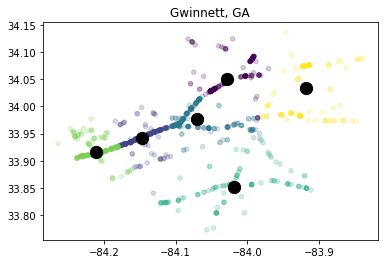

In [192]:
# Gwinnett, GA
county_acc = df.loc[(df['County']==county_info['County'][34]) & (df['State']=='GA'), ['Start_Lng', 'Start_Lat']]
location = county_acc.values
n = 6
kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
y_kmeans = kmeans.predict(location)
plt.scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis', alpha=0.2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=1)
plt.title('Gwinnett, GA')

county_acc_GA5_centers = pd.DataFrame(kmeans.cluster_centers_).rename(columns={0: 'Lat', 1: "Lng"})
county_acc_GA5_centers['State']='GA'
county_acc_GA5_centers['County']='Gwinnett'
county_acc_GA5_centers['center_id'] = county_acc_GA5_centers.index
unique, counts = np.unique(kmeans.labels_, return_counts=True)
counts = pd.DataFrame({'counts':counts})
county_acc_GA5_centers['counts'] = counts
county_acc_GA5_centers

In [193]:
centers = pd.concat([county_acc_CA1_centers,county_acc_CA2_centers,county_acc_CA3_centers, county_acc_CA4_centers, county_acc_CA5_centers, county_acc_FL1_centers,county_acc_FL2_centers,county_acc_FL3_centers, county_acc_FL4_centers, county_acc_FL5_centers,county_acc_TX1_centers,county_acc_TX2_centers,county_acc_TX3_centers, county_acc_TX4_centers, county_acc_TX5_centers, county_acc_GA1_centers,county_acc_GA2_centers,county_acc_GA3_centers, county_acc_GA4_centers, county_acc_GA5_centers])

In [194]:
centers.to_csv('Centers.csv',index=False)